# Stream Network Abstraction - Alonso Gonzalez

[Presentation](http://spatial-ecology.net/docs/source/STUDENTSPROJECTS/Proj_2022_Matera/Stream_Network_Abstraction_Alonso_Gonzalez.pdf)  
[Video Recording](https://youtu.be/fOEBNDqoYvI)

In [ ]:
%%bash
cd /home/user/my_SE_data/exercise

In [ ]:
grass78 -text grassdb/europe/PERMANENT/ <<EOF
g.extension extension=r.stream.basins
EOF

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('geodata/shp/tilesComp.shp')
print (gdf)
gdf.plot(edgecolor="purple", facecolor="None")


In [6]:
%%bash

cd /home/user/my_SE_data/exercise
grass78  -f -text --tmp-location  -c  geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif  <<'EOF'

g.gisenv set="GRASS_VERBOSE=-1","DEBUG=0"

## import the layers
r.external input=geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif output=elv --o --q # dem
r.external input=geodata/dem/SA_all_dep_1km.tif                   output=dep --o --q # depression
r.external input=geodata/dem/SA_are_1km_msk.tif                   output=are --o --q # area-pixel
r.external input=geodata/mask/msk_1km.tif                         output=msk --o --q # land-ocean mask

g.region  -m

for tile in 1 2 3  ; do     # loop for each tile
r.mask raster=msk --o --q   # usefull to mask the flow accumulation

# extract tile extent from the  tilesComp.shp
wL=$(ogrinfo -al -where  " id  = '$tile' " geodata/shp/tilesComp.shp | grep POLYGON | awk '{ gsub(/[(()),]/," ",$0 ); print $2 }')
nL=$(ogrinfo -al -where  " id  = '$tile' " geodata/shp/tilesComp.shp | grep POLYGON | awk '{ gsub(/[(()),]/," ",$0 ); print $3 }')
eL=$(ogrinfo -al -where  " id  = '$tile' " geodata/shp/tilesComp.shp | grep POLYGON | awk '{ gsub(/[(()),]/," ",$0 ); print $4 }')
sL=$(ogrinfo -al -where  " id  = '$tile' " geodata/shp/tilesComp.shp | grep POLYGON | awk '{ gsub(/[(()),]/," ",$0 ); print $7 }')

g.region w=$wL  n=$nL  s=$sL  e=$eL  res=0:00:30   --o
g.region -m

### maximum ram 66571M  for 2^63 -1   (2 147 483 647 cell)  / 1 000 000  * 31 M
####  -m  Enable disk swap memory option: Operation is slow
####  -b Beautify flat areas
####   threshold=1  = ~1 km2 = 0.9  m2

echo "############# compute the flow accumulation using MFD for tile $tile ##############"
r.watershed  -b  elevation=elv  depression=dep  accumulation=flow drainage=dir_rw flow=are   memory=2000 --o --q

echo "############# extract stream ##################"
r.stream.extract elevation=elv accumulation=flow depression=dep threshold=8 direction=dir_rs stream_raster=stream  memory=2000 --o --q


done

EOF



projection=3
zone=0
n=14
s=-56
w=-83
e=-34
nsres=923.44150551
ewres=703.7149865
rows=8400
cols=5880
cells=49392000
projection=3
zone=0
n=-12
s=-56
w=-76.4
e=-43
nsres=924.52244935
ewres=710.89449752
rows=5280
cols=4008
cells=21162240
############# compute the flow accumulation using MFD for tile 1 ##############
############# extract stream ##################
projection=3
zone=0
n=1
s=-38
w=-73.9
e=-34.6
nsres=922.66504302
ewres=826.93226998
rows=4680
cols=4716
cells=22070880
############# compute the flow accumulation using MFD for tile 2 ##############
############# extract stream ##################
projection=3
zone=0
n=12.7
s=-24.5
w=-81.7
e=-41.7
nsres=921.8619211
ewres=872.86703289
rows=4464
cols=4800
cells=21427200
############# compute the flow accumulation using MFD for tile 3 ##############
############# extract stream ##################


Starting GRASS GIS...
Creating new GRASS GIS location <tmploc>...
Cleaning up temporary files...

          __________  ___   __________    _______________
         / ____/ __ \/   | / ___/ ___/   / ____/  _/ ___/
        / / __/ /_/ / /| | \__ \\_  \   / / __ / / \__ \
       / /_/ / _, _/ ___ |___/ /__/ /  / /_/ // / ___/ /
       \____/_/ |_/_/  |_/____/____/   \____/___//____/

Welcome to GRASS GIS 7.8.5
GRASS GIS homepage:                      https://grass.osgeo.org
This version running through:            Bash Shell (/bin/bash)
Help is available with the command:      g.manual -i
See the licence terms with:              g.version -c
See citation options with:               g.version -x
Start the GUI with:                      g.gui wxpython
When ready to quit enter:                exit

corrupted size vs. prev_size while consolidating
/bin/bash: line 5: 15762 Aborted                 (core dumped) r.external input=geodata/dem/SA_elevation_mn_GMTED2010_mn_msk.tif output=elv --o --

In [2]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

/home/user/my_SE_data/exercise/geodata/dem/flow_*.tif


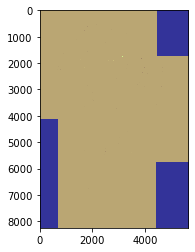

In [11]:
#Creates the route to grab documents
dirpath = r"/home/user/my_SE_data/exercise/geodata/dem/"
out_fp = r"/home/user/my_SE_data/exercise/geodata/dem/CurrentsLA.tif"
# Make a search criteria to select the DEM files
search_criteria = "flow_*.tif"
q = os.path.join(dirpath, search_criteria)
print(q)
#________________________________________________________________________________________#
#________________________________________________________________________________________#
#________________________________________________________________________________________#
#Creates an array of objects to merge
dem_fps = glob.glob(q)
dem_fps
#________________________________________________________________________________________#
#________________________________________________________________________________________#
#________________________________________________________________________________________#
#Create a list of files to append
src_files_to_mosaic = []
for fp in dem_fps:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
    
mosaic, out_trans = merge(src_files_to_mosaic)
show(mosaic, cmap='terrain')

out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
                    "height": mosaic.shape[1],
                    "width": mosaic.shape[2],
                    "transform": out_trans,
                    "crs": "epsg:4326"
                    }
                    )


In [12]:
src_files_to_mosaic


[<open DatasetReader name='/home/user/my_SE_data/exercise/geodata/dem/flow_1.tif' mode='r'>,
 <open DatasetReader name='/home/user/my_SE_data/exercise/geodata/dem/flow_2.tif' mode='r'>,
 <open DatasetReader name='/home/user/my_SE_data/exercise/geodata/dem/flow_3.tif' mode='r'>]

In [13]:
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)


In [3]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [32]:
window = rasterio.windows.Window(0, 200, 900, 1100)

with rasterio.open('/home/user/my_SE_data/exercise/geodata/dem/CurrentsLA.tif') as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(6,10))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
#plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')